# Decision Trees

on the penguin dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

### Preparations

In [2]:
df = pd.read_csv('all_penguins_clean.csv', index_col=0)
df.dropna(inplace=True)
df.head()

,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Real ID,Sex
studyName,,,,,,,,,,,,,,
PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,A_0,MALE
PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,A_1,FEMALE
PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,A_2,FEMALE
PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,A_4,FEMALE
PAL0708,6,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,A_5,MALE


#### 1. Inspect the size of the dataset

In [3]:
df.shape

(334, 14)

#### 2. Select the Species column to use as target

In [4]:
y = df['Species']
y


studyName
PAL0708    Adelie
PAL0708    Adelie
PAL0708    Adelie
PAL0708    Adelie
PAL0708    Adelie
            ...  
PAL0910    Gentoo
PAL0910    Gentoo
PAL0910    Gentoo
PAL0910    Gentoo
PAL0910    Gentoo
Name: Species, Length: 334, dtype: object

#### 3. Select two columns to use as input features

In [5]:
X = df[['Culmen Length (mm)' , 'Culmen Depth (mm)']]
X

,Culmen Length (mm),Culmen Depth (mm)
studyName,,
PAL0708,39.1,18.7
PAL0708,39.5,17.4
PAL0708,40.3,18.0
PAL0708,36.7,19.3
PAL0708,39.3,20.6
...,...,...
PAL0910,47.2,13.7
PAL0910,46.8,14.3
PAL0910,50.4,15.7


#### 4. Plot the data

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

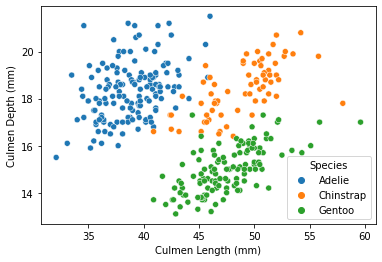

In [6]:
sns.scatterplot(x='Culmen Length (mm)', y='Culmen Depth (mm)' , hue='Species', data=df)

## Decision Tree from Scratch

#### 5. Make one prediction for every penguin

In [7]:
predictions = []
for i, row in X.iterrows():
    # i: index, row: values of a row as a pd.Series
    if row['Culmen Length (mm)'] < 42.4:
        predictions.append('Adelie')
    elif row['Culmen Depth (mm)'] < 16.8:
        predictions.append('Gentoo')
    else:
        predictions.append('Chinstrap') 

        
predictions

['Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Chinstrap',
 'Adelie',
 'Chinstrap',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Chinstrap',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Chinstrap',
 'Adelie',
 'Chinstrap',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Chinstrap',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'A

#### 6. Calculate the accuracy of the model

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(y, predictions)

0.9131736526946108

## Find the optimal separation with Scikit

#### 7. Train the model

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
m = DecisionTreeClassifier(max_depth=2)  # we allow that many questions
m.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

#### 8. Make predictions

In [12]:
ypred = m.predict(X_test)

#### 9. Calculate the accuracy

In [13]:
accuracy_score(ypred, y_test)

0.9404761904761905

## Plot the tree

#### 10. Plot the tree with according labels

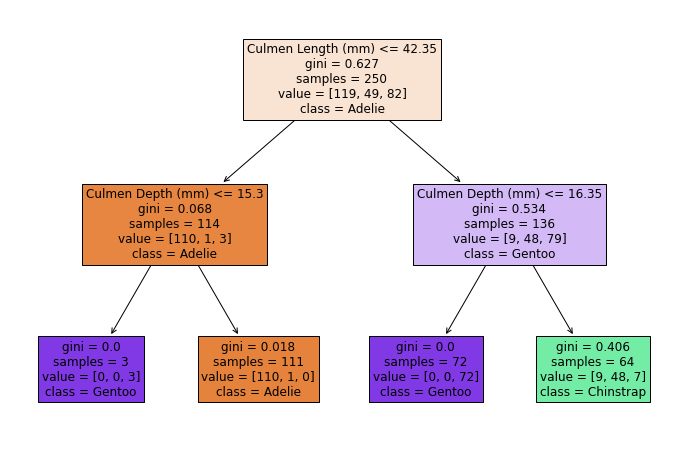

In [18]:
plt.figure(figsize=(12, 8))
t = plot_tree(m, feature_names=['Culmen Length (mm)', 'Culmen Depth (mm)', 'Species'], class_names=m.classes_, filled =True, fontsize=12)